# UNIT 2. Statistical Learning

This Unit includes an introduction to statistical learning strongly based in {cite:p}`kroese2020`.

## Some general concepts

### Probability distribution function (pdf)

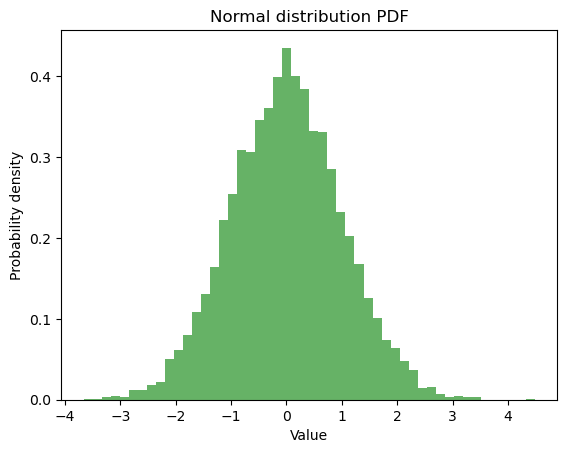

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Define the parameters of the normal distribution
mu = 0  # mean
sigma = 1  # standard deviation

# Generate random numbers from the normal distribution
x = np.random.normal(mu, sigma, 10000)

# Plot the PDF of the normal distribution
plt.hist(x, bins=50, density=True, alpha=0.6, color='g')
plt.xlabel('Value')
plt.ylabel('Probability density')
plt.title('Normal distribution PDF')
plt.show()

[4 4] [12  9]


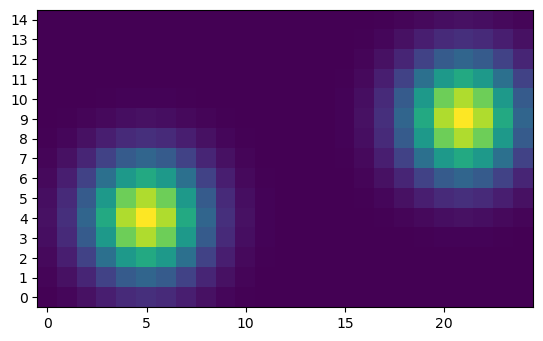

In [43]:
import numpy as np
from scipy.ndimage import gaussian_filter
import matplotlib.pyplot as plt

num_centers = 2
sigma = 2
Columns = 25
Rows = 15
size = (x, y)
yticks = range(Rows)
impulses = np.zeros(size)

# rows and cols are the row and column indices of the centers
# of the gaussian peaks.
np.random.seed(123456)
rows, cols = np.unravel_index(np.random.choice(impulses.size, replace=False,
                                               size=num_centers),impulses.shape)
print(rows,cols)
rows, cols = [10,5], [5,21]
impulses[rows, cols] = 1
# or use this if you want duplicates to sum:
#np.add.at(impulses, (rows, cols), 1)

# Filter impulses to create the result.
result = gaussian_filter(impulses, sigma, mode='nearest')
plt.yticks(yticks, yticks[::-1])
plt.imshow(result)
plt.show()

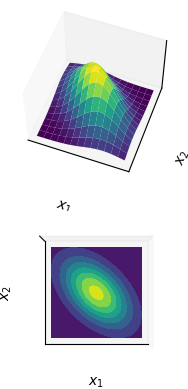

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

# Our 2-dimensional distribution will be over variables X and Y
N = 40
X = np.linspace(-2, 2, N)
Y = np.linspace(-2, 2, N)
X, Y = np.meshgrid(X, Y)

# Mean vector and covariance matrix
mu = np.array([0., 0.])
Sigma = np.array([[ 1. , -0.5], [-0.5,  1.]])

# Pack X and Y into a single 3-dimensional array
pos = np.empty(X.shape + (2,))
pos[:, :, 0] = X
pos[:, :, 1] = Y

def multivariate_gaussian(pos, mu, Sigma):
    """Return the multivariate Gaussian distribution on array pos."""

    n = mu.shape[0]
    Sigma_det = np.linalg.det(Sigma)
    Sigma_inv = np.linalg.inv(Sigma)
    N = np.sqrt((2*np.pi)**n * Sigma_det)
    # This einsum call calculates (x-mu)T.Sigma-1.(x-mu) in a vectorized
    # way across all the input variables.
    fac = np.einsum('...k,kl,...l->...', pos-mu, Sigma_inv, pos-mu)

    return np.exp(-fac / 2) / N

# The distribution on the variables X, Y packed into pos.
Z = multivariate_gaussian(pos, mu, Sigma)

# plot using subplots
fig = plt.figure()
ax1 = fig.add_subplot(2,1,1,projection='3d')

ax1.plot_surface(X, Y, Z, rstride=3, cstride=3, linewidth=1, antialiased=True,
                cmap=cm.viridis)
ax1.view_init(55,-70)
ax1.set_xticks([])
ax1.set_yticks([])
ax1.set_zticks([])
ax1.set_xlabel(r'$x_1$')
ax1.set_ylabel(r'$x_2$')

ax2 = fig.add_subplot(2,1,2,projection='3d')
ax2.contourf(X, Y, Z, zdir='z', offset=0, cmap=cm.viridis)
ax2.view_init(90, 270)

ax2.grid(False)
ax2.set_xticks([])
ax2.set_yticks([])
ax2.set_zticks([])
ax2.set_xlabel(r'$x_1$')
ax2.set_ylabel(r'$x_2$')

plt.show()

In [2]:
import numpy as np
def twoD_Gaussian(amp0, x0, y0, amp1=13721, x1=356, y1=247, amp2=14753, x2=291,  y2=339, sigma=40):

    x0 = float(x0)
    y0 = float(y0)
    x1 = float(x1)
    y1 = float(y1)
    x2 = float(x2)
    y2 = float(y2)

    return lambda x, y:  (amp0*np.exp(-(((x0-x)/sigma)**2+((y0-y)/sigma)**2)/2))+(
                             amp1*np.exp(-(((x1-x)/sigma)**2+((y1-y)/sigma)**2)/2))+(
                             amp2*np.exp(-(((x2-x)/sigma)**2+((y2-y)/sigma)**2)/2))

x = np.linspace(1, 3.5, 6)
y = np.linspace(1, 3, 5)
X, Y = np.meshgrid(x, y)
z = np.array([F(x,y) for x,y in zip(np.ravel(X), np.ravel(Y))])
Z = z.reshape(X.shape)
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('F(X, Y)')
plt.show()

NameError: name 'F' is not defined

In [10]:
import cv2
import numpy as np

#read image
src = cv2.imread('../figures/test.png', cv2.IMREAD_UNCHANGED)
print(src.shape)

# extract red channel
red_channel = src[:,:,2]

# create empty image with same shape as that of src image
red_img = np.zeros(src.shape)

#assign the red channel of src to empty image
red_img[:,:,2] = red_channel

#save image
cv2.imwrite('../figures/FCTEred.png',red_img) 

(5304, 7952, 3)


True

In [11]:
from scipy.optimize import leastsq
import numpy as np
import matplotlib.pyplot as plt

def twoD_Gaussian(amp0, x0, y0, amp1=13721, x1=356, y1=247,  sigma=40):

    x0 = float(x0)
    y0 = float(y0)
    x1 = float(x1)
    y1 = float(y1)
    
    return lambda x, y:  (amp0*np.exp(-(((x0-x)/sigma)**2+((y0-y)/sigma)**2)/2))+(amp1*np.exp(-(((x1-x)/sigma)**2+((y1-y)/sigma)**2)/2))
     
# Create data indices
I = red_channel   # Red channel of a scanned image, equivalent to the  1st image displayed in this post.
p = np.asarray(I).astype('float')
w,h = np.shape(I)
x, y = np.mgrid[0:h, 0:w]
xy = (x,y)

# scanned at 150 dpi = 5.91 dots per mm
dpmm = 5.905511811
plot_width = 40*dpmm

# create function indices
fdims = np.round(plot_width/2)  
xdims = (RC[0] - fdims, RC[0] + fdims)
ydims = (RC[1] - fdims, RC[1] + fdims)
fx = np.linspace(xdims[0], xdims[1], np.round(plot_width))
fy = np.linspace(ydims[0], ydims[1], np.round(plot_width))
fx,fy = np.meshgrid(fx,fy)

#Crop image for display
crp_data = image[xdims[0]:xdims[1], ydims[0]:ydims[1]]
z = crp_data    

# Parameters obtained from separate fits
Amplitudes = (13245, 13721, 15374)
px = (410, 356, 290)
py = (350, 247, 339)

initial_guess_sum = (Amp[0], px[0], py[0], Amp[1], px[1], py[1], Amp[2], px[2], py[2])
initial_guess_peak3 = (Amp[0], px[0], py[0]) # Try fitting single peak within sum


fitted_pars = fitgaussian2D(x, y, z, initial_guess_sum)
#fitted_pars = fitgaussian2D(x, y, z, initial_guess_peak3)

data_fitted= twoD_Gaussian(*fitted_pars)(fx,fy)
#data_fitted= twoD_Gaussian(*initial_guess_sum)(fx,fy)



fig = plt.figure(figsize=(10, 30))
ax = fig.add_subplot(111, aspect="equal")
#fig, ax = plt.subplots(1)
cb = ax.imshow(p, cmap=plt.cm.jet, origin='bottom',
    extent=(x.min(), x.max(), y.min(), y.max()))
ax.contour(fx, fy, data_fitted.reshape(fx.shape[0], fy.shape[1]), 4, colors='w')

ax.set_xlim(np.int(RC[0])-135, np.int(RC[0])+135)
ax.set_ylim(np.int(RC[1])+135, np.int(RC[1])-135)

#plt.colorbar(cb)
plt.show()

NameError: name 'RC' is not defined

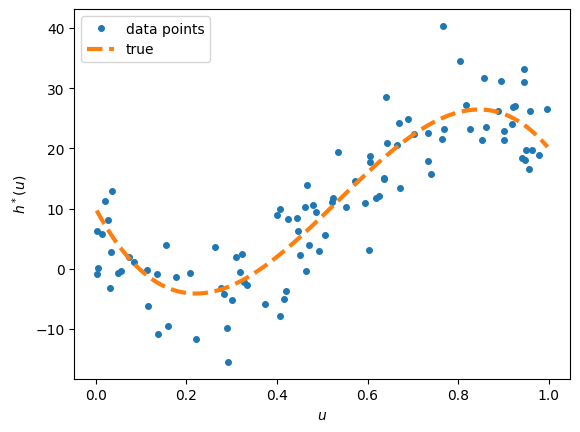

In [9]:
""" polyreg1.py """
import numpy as np
from numpy.random import rand , randn
from numpy.linalg import norm , solve
import matplotlib.pyplot as plt
def generate_data(beta , sig, n):
   u = np.random.rand(n, 1)
   y = (u ** np.arange(0, 4)) @ beta + sig * np.random.randn(n, 1)
   return u, y
np.random.seed(12)
beta = np.array([[10, -140, 400, -250]]).T
n = 100
sig = 5
u, y = generate_data(beta , sig, n)
xx = np.arange(np.min(u), np.max(u)+5e-3, 5e-3)
yy = np.polyval(np.flip(beta), xx)
plt.plot(u, y, '.', markersize=8)
plt.plot(xx, yy, '--',linewidth=3)

# %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
plt.xlabel(r'$u$')
plt.ylabel(r'$h^*(u)$')
plt.legend(['data points','true'])
plt.savefig('../figures/polydatpy.pdf',format='pdf')
plt.show()
# %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%

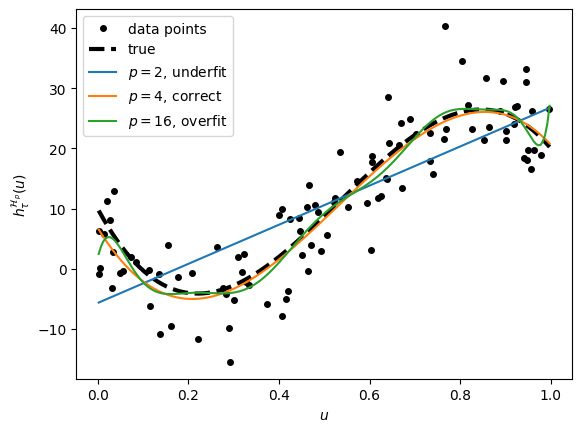

In [10]:
""" polyreg2.py """

max_p = 18
p_range = np.arange(1, max_p + 1, 1)
X = np.ones((n, 1))
betahat, trainloss = {}, {}

for p in p_range:  # p is the number of parameters
    if p > 1:
        X = np.hstack((X, u**(p-1)))  # add column to matrix

    betahat[p] = solve(X.T @ X, X.T @ y)
    trainloss[p] = (norm(y - X @ betahat[p])**2/n)

p = [2, 4, 16]  # select three curves

#replot the points and true line and store in the list "plots"
plots = [plt.plot(u, y, 'k.', markersize=8)[0], 
         plt.plot(xx, yy, 'k--',linewidth=3)[0]]
# add the three curves
for i in p:
    yy = np.polyval(np.flip(betahat[i]), xx)
    plots.append(plt.plot(xx, yy)[0])

# %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
plt.xlabel(r'$u$')
plt.ylabel(r'$h^{\mathcal{H}_p}_{\tau}(u)$')
plt.legend(plots,('data points', 'true','$p=2$, underfit',
                  '$p=4$, correct','$p=16$, overfit','d'))
plt.savefig('../figures/polyfitpy.pdf',format='pdf')
plt.show()
# %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%

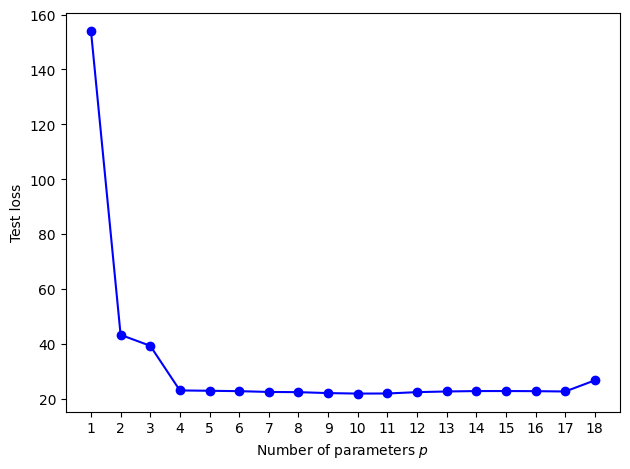

In [11]:
""" polyreg3.py """
  
# generate test data
u_test, y_test = generate_data(beta, sig, n)

MSE = []
X_test = np.ones((n, 1))

for p in p_range:
    if p > 1:
        X_test = np.hstack((X_test, u_test**(p-1)))

    y_hat = X_test @ betahat[p]  # predictions
    MSE.append(np.sum((y_test - y_hat)**2/n))

# %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
plt.plot(p_range, MSE, 'b', p_range, MSE, 'bo')
plt.xticks(ticks=p_range)
plt.xlabel('Number of parameters $p$')
plt.ylabel('Test loss')
plt.tight_layout()
plt.savefig('../figures/MSEpy.pdf',format='pdf')
plt.show()
# %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%

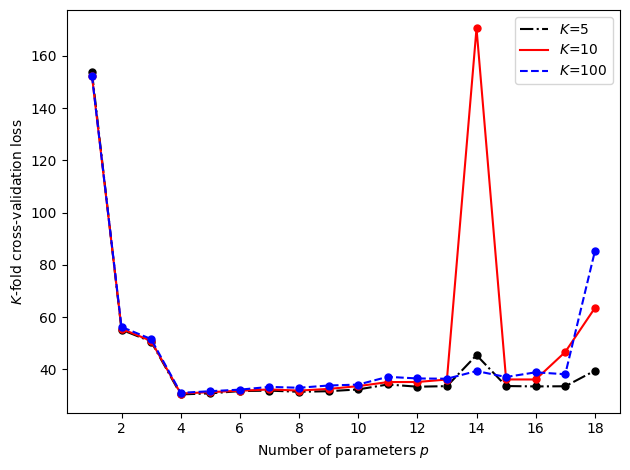

In [12]:
""" polyregCV.py """

K_vals = [5, 10, 100]  # number of folds
cv = np.zeros((len(K_vals), max_p))
X = np.ones((n, 1))

for p in p_range:
    if p > 1:
        X = np.hstack((X, u**(p-1)))
    j = 0
    for K in K_vals:
        loss = []
        for k in range(1, K+1):
            # integer indices of test samples
            test_ind = ((n/K)*(k-1) + np.arange(1, n/K + 1) - 1).astype('int')
            train_ind = np.setdiff1d(np.arange(n), test_ind)

            X_train, y_train = X[train_ind, :], y[train_ind, :]
            X_test, y_test = X[test_ind, :], y[test_ind]

            # fit model and evaluate test loss
            betahat = solve(X_train.T @ X_train, X_train.T @ y_train)
            loss.append(norm(y_test - X_test @ betahat) ** 2)

        cv[j, p-1] = sum(loss) / n
        j += 1

# %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
p1 = plt.plot(p_range, cv[0, :], 'k-.', p_range, cv[0, :], 'k.', markersize=10)[0]
p2 = plt.plot(p_range, cv[1, :], 'r', p_range, cv[1, :], 'r.', markersize=10)[0]
p3 = plt.plot(p_range, cv[2, :], 'b--', p_range, cv[2, :], 'b.', markersize=10)[0]
plt.xticks(range(2, 19, 2))
plt.xlabel('Number of parameters $p$')
plt.ylabel('$K$-fold cross-validation loss')
plt.legend((p1,p2,p3),('$K$=5','$K$=10','$K$=100'))
plt.tight_layout()
plt.savefig('../figures/crossvalpy.pdf',format='pdf')
plt.show()
# %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
